# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pycaret.regression import *

# Read In of Dataset for Evaluation

In [2]:
eval_data = pd.read_csv("evaluation_dataset.csv")

In [3]:
eval_data.head()

,extruder_size,metering_depth,polymer_density,rpm,screw_pitch,flight_width,number_flight,extrucal
0,50,2.5,1000,0,50,5.0,1,0.00
1,50,2.5,1000,10,50,5.0,1,4.59
2,50,2.5,1000,20,50,5.0,1,9.18
3,50,2.5,1000,30,50,5.0,1,13.77
4,50,2.5,1000,40,50,5.0,1,18.36


In [4]:
eval_x = eval_data.drop(columns=["extrucal"])

In [5]:
eval_x.head()

,extruder_size,metering_depth,polymer_density,rpm,screw_pitch,flight_width,number_flight
0,50,2.5,1000,0,50,5.0,1
1,50,2.5,1000,10,50,5.0,1
2,50,2.5,1000,20,50,5.0,1
3,50,2.5,1000,30,50,5.0,1
4,50,2.5,1000,40,50,5.0,1


# Evaluation of Normalized Model

In [6]:
# Normalized Model

catb_norm = load_model("catb_normalized")

Transformation Pipeline and Model Successfully Loaded


In [7]:
eval_data_simple = eval_data.copy()

In [8]:
eval_data_simple["CatBoost_Norm"] = predict_model(catb_norm, data=eval_x)["Label"]

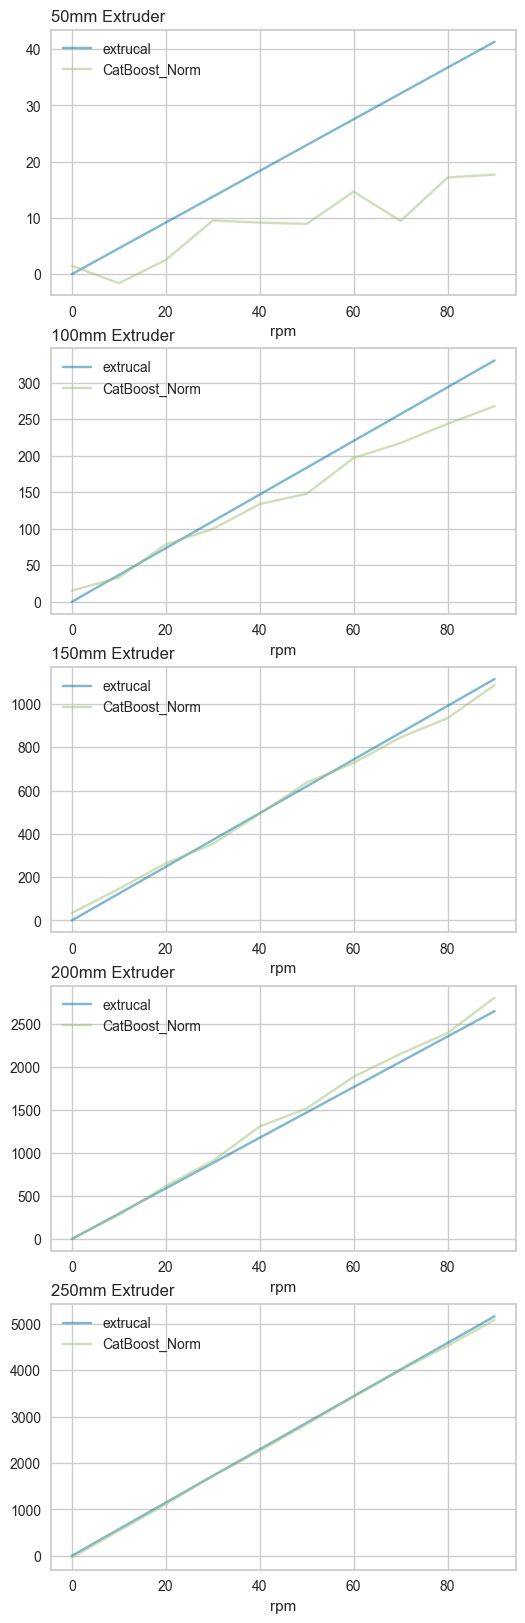

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 20))

fig = eval_data_simple.loc[0:9, ["rpm", "extrucal", "CatBoost_Norm"]].plot.line(
    x="rpm", ax=axes[0], alpha=0.5
)
fig.set_title("50mm Extruder", loc='left')
fig = eval_data_simple.loc[10:19, ["rpm", "extrucal", "CatBoost_Norm"]].plot.line(
    x="rpm", ax=axes[1], alpha=0.5
)
fig.set_title("100mm Extruder", loc='left')
fig = eval_data_simple.loc[20:29, ["rpm", "extrucal", "CatBoost_Norm"]].plot.line(
    x="rpm", ax=axes[2], alpha=0.5
)
fig.set_title("150mm Extruder", loc='left')
fig = eval_data_simple.loc[30:39, ["rpm", "extrucal", "CatBoost_Norm"]].plot.line(
    x="rpm", ax=axes[3], alpha=0.5
)
fig.set_title("200mm Extruder", loc='left')
fig = eval_data_simple.loc[40:, ["rpm", "extrucal", "CatBoost_Norm"]].plot.line(
    x="rpm", ax=axes[4], alpha=0.5
)
fig.set_title("250mm Extruder", loc='left')
plt.show();

# Evaluation of Normalized and Target_Transformed Model

In [10]:
# Normalized and Target-Transformed Model

catb_norm_trans = load_model("catb_normalized_target-transformed")

Transformation Pipeline and Model Successfully Loaded


In [11]:
eval_data_logging = eval_data.copy()

In [12]:
eval_data_logging["CatBoost_Norm_Trans"] = predict_model(catb_norm_trans, data=eval_x)["Label"]

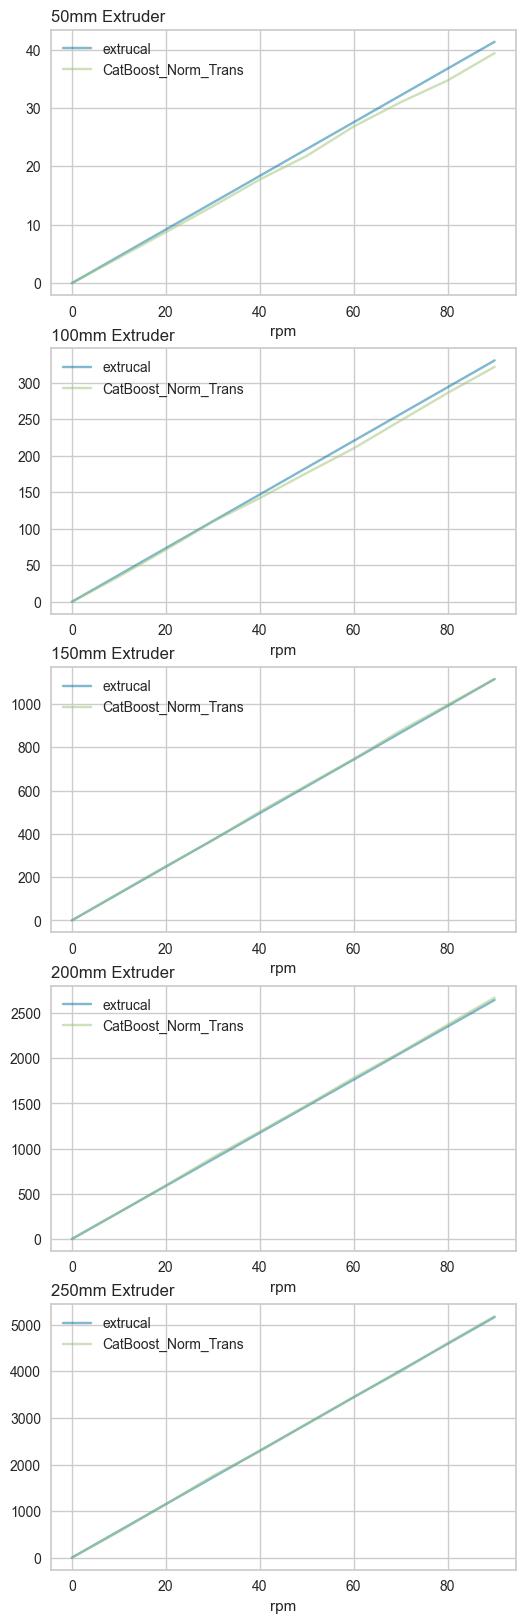

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 20))

fig = eval_data_logging.loc[0:9, ["rpm", "extrucal", "CatBoost_Norm_Trans"]].plot.line(
    x="rpm", ax=axes[0], alpha=0.5
)
fig.set_title("50mm Extruder", loc='left')
fig = eval_data_logging.loc[10:19, ["rpm", "extrucal", "CatBoost_Norm_Trans"]].plot.line(
    x="rpm", ax=axes[1], alpha=0.5
)
fig.set_title("100mm Extruder", loc='left')
fig = eval_data_logging.loc[20:29, ["rpm", "extrucal", "CatBoost_Norm_Trans"]].plot.line(
    x="rpm", ax=axes[2], alpha=0.5
)
fig.set_title("150mm Extruder", loc='left')
fig = eval_data_logging.loc[30:39, ["rpm", "extrucal", "CatBoost_Norm_Trans"]].plot.line(
    x="rpm", ax=axes[3], alpha=0.5
)
fig.set_title("200mm Extruder", loc='left')
fig = eval_data_logging.loc[40:, ["rpm", "extrucal", "CatBoost_Norm_Trans"]].plot.line(
    x="rpm", ax=axes[4], alpha=0.5
)
fig.set_title("250mm Extruder", loc='left')
plt.show();